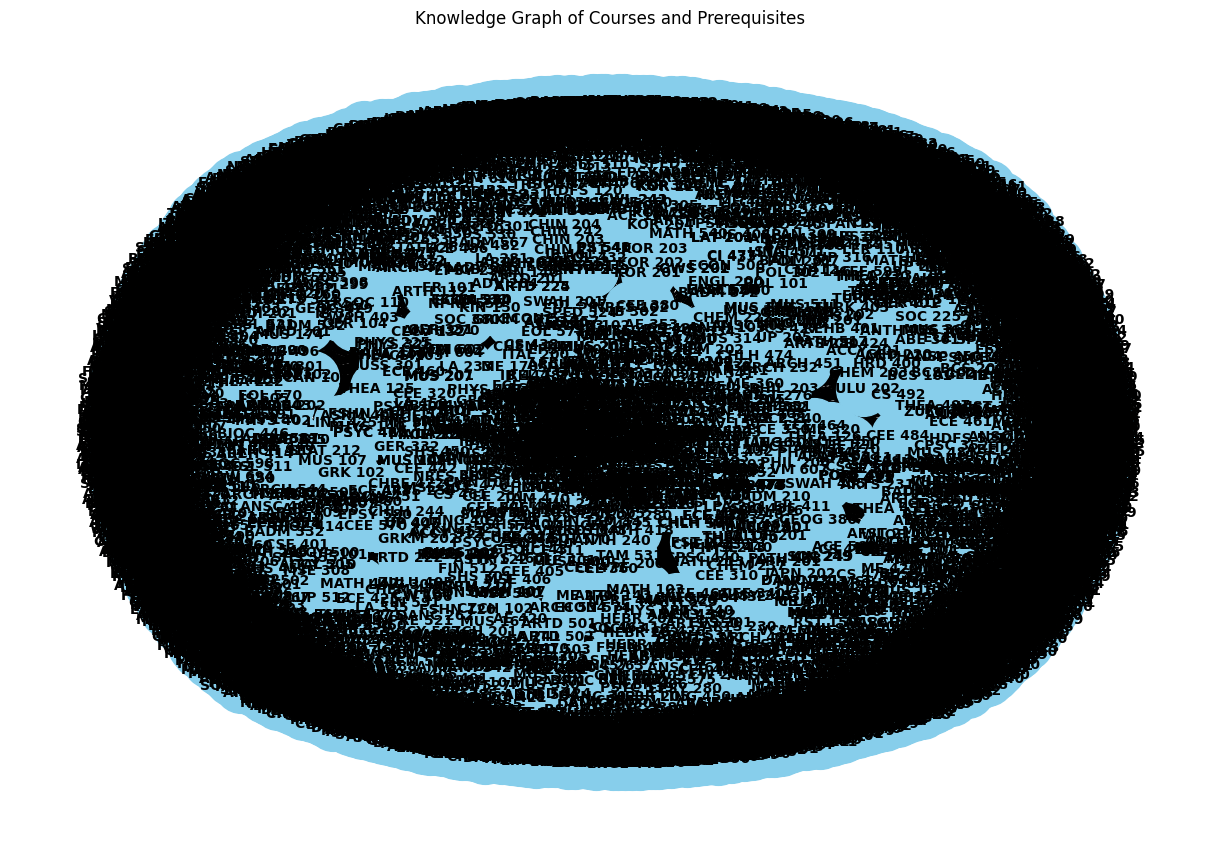

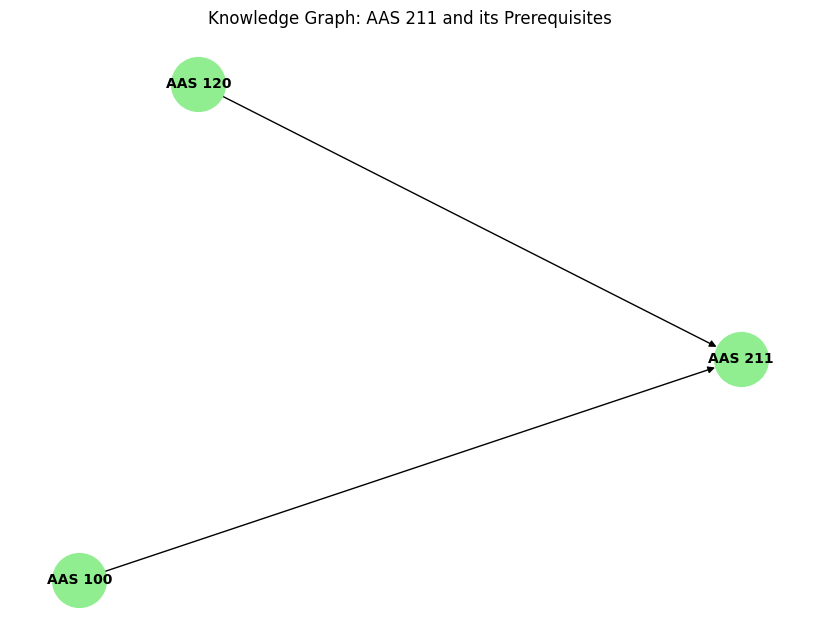

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv('uiuc-prerequisites.csv')

data.fillna({'PrerequisiteNumber': 0}, inplace=True)

knowledge_graph = nx.DiGraph()

for _, row in data.iterrows():
    course = row['Course']
    prerequisites = [row[str(i)] for i in range(10) if pd.notna(row[str(i)])]  
    
    knowledge_graph.add_node(course, type='course')
    
    for prereq in prerequisites:
        if prereq != 'No prerequisites' and prereq.strip():
            knowledge_graph.add_edge(prereq, course, relationship='prerequisite')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(knowledge_graph, seed=42)
nx.draw(knowledge_graph, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
plt.title("Knowledge Graph of Courses and Prerequisites")
plt.show()

with open("knowledge_graph_uiuc.gpickle", "wb") as f:
    pickle.dump(knowledge_graph, f)

selected_course = 'AAS 211'  

subgraph_nodes = list(knowledge_graph.predecessors(selected_course)) + [selected_course]
subgraph = knowledge_graph.subgraph(subgraph_nodes)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=1500,
    font_size=10,
    font_weight='bold',
)
plt.title(f"Knowledge Graph: {selected_course} and its Prerequisites")
plt.show()


Prerequisites for AAS 211: ['AAS 100', 'AAS 120']


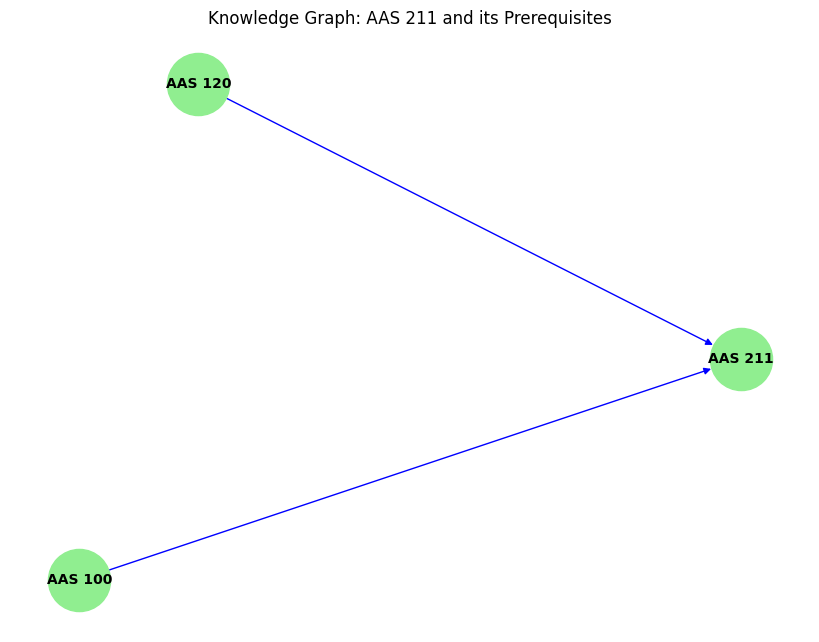

In [3]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt

# Load the saved knowledge graph
with open('knowledge_graph_uiuc.gpickle', 'rb') as f:
    knowledge_graph = pickle.load(f)

# Function to predict prerequisites of a course
def predict_course_prerequisites(course_title, graph):
    # Fetch the prerequisites for the given course
    prerequisites = list(graph.predecessors(course_title))
    if prerequisites:
        return prerequisites
    else:
        return ["No prerequisites found"]

# Make a prediction for a course (example: 'AAS 211')
selected_course = 'AAS 211'
prerequisites = predict_course_prerequisites(selected_course, knowledge_graph)

print(f"Prerequisites for {selected_course}: {prerequisites}")

# Create a subgraph including the course and its prerequisites
subgraph_nodes = [selected_course] + prerequisites
subgraph = knowledge_graph.subgraph(subgraph_nodes)

# Plot the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42)  # Layout for the nodes

# Drawing the graph
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=10,
    font_weight='bold',
    edge_color='blue'
)

# Title for the plot
plt.title(f"Knowledge Graph: {selected_course} and its Prerequisites")
plt.show()


Generating BERT embeddings for prerequisites. This might take some time...


c:\Users\user123\anaconda3\envs\project\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user123\anaconda3\envs\project\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user123\anaconda3\envs\project\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


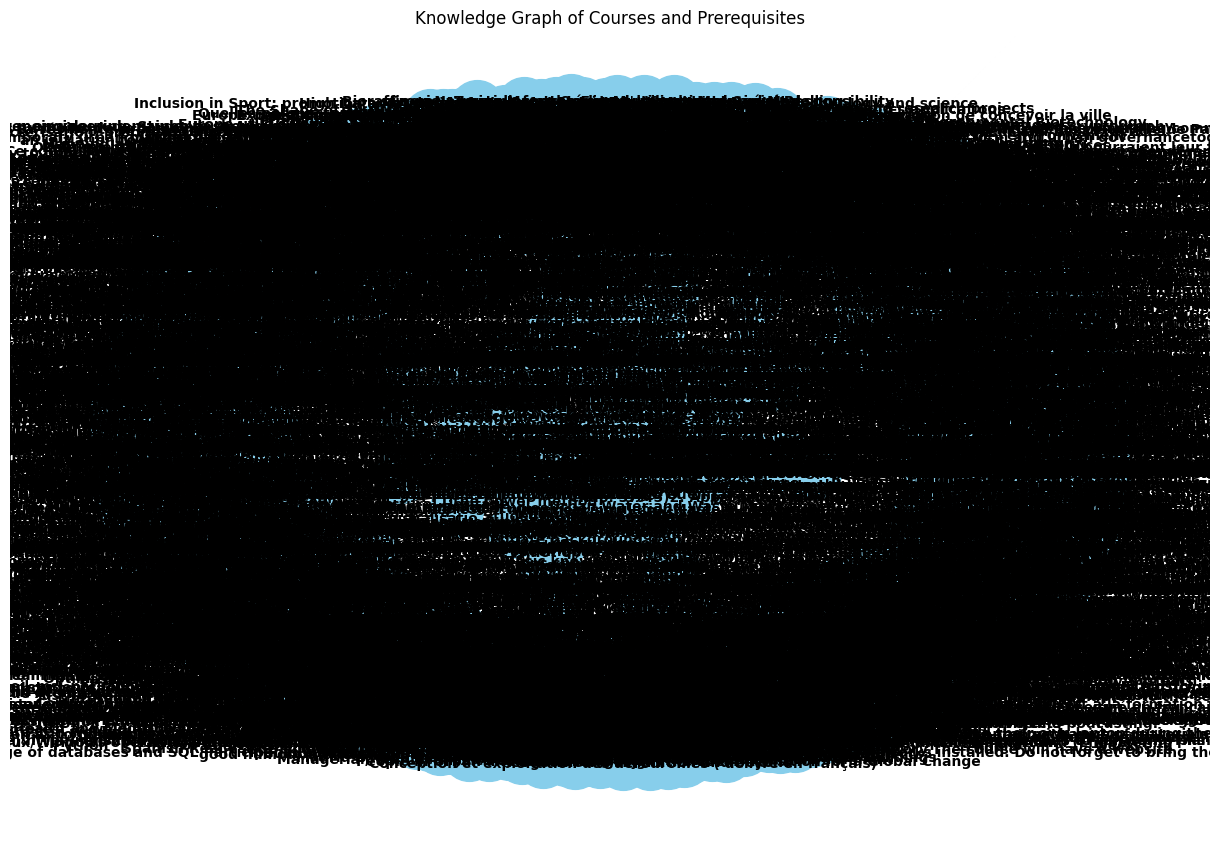

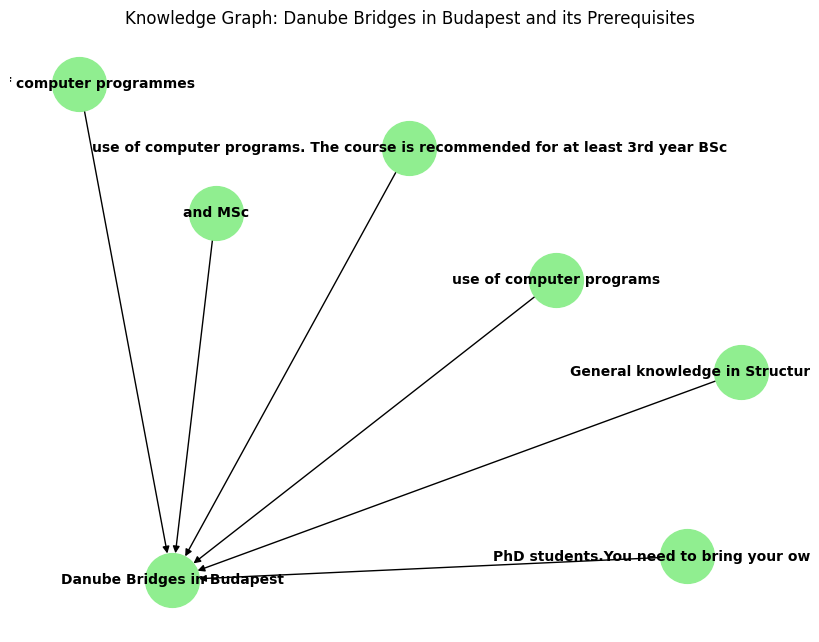

In [42]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import networkx as nx
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv('results_all.csv')

data_cleaned = data.drop_duplicates()
data_cleaned['Prerequisites'].fillna('No prerequisites', inplace=True)

string_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[string_columns] = data_cleaned[string_columns].apply(lambda x: x.str.strip())

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

print("Generating BERT embeddings for prerequisites. This might take some time...")
data_cleaned['Prerequisites_Embedding'] = data_cleaned['Prerequisites'].apply(get_bert_embeddings)

data_cleaned.to_pickle('processed_data_with_embeddings.pkl')

knowledge_graph = nx.DiGraph()

for _, row in data_cleaned.iterrows():
    course_title = row['What']  
    prerequisites = row['Prerequisites'].split(", ")  
    
    knowledge_graph.add_node(course_title, type='course', prerequisites=row['Prerequisites'])
    
    for prereq in prerequisites:
        if prereq != 'No prerequisites' and prereq.strip():
            knowledge_graph.add_edge(prereq, course_title, relationship='prerequisite')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(knowledge_graph, seed=42)
nx.draw(knowledge_graph, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
plt.title("Knowledge Graph of Courses and Prerequisites")
plt.show()

with open("knowledge_graph.gpickle", "wb") as f:
    pickle.dump(knowledge_graph, f)

selected_course = 'Danube Bridges in Budapest'  

subgraph_nodes = list(knowledge_graph.predecessors(selected_course)) + [selected_course]
subgraph = knowledge_graph.subgraph(subgraph_nodes)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=1500,
    font_size=10,
    font_weight='bold',
)
plt.title(f"Knowledge Graph: {selected_course} and its Prerequisites")
plt.show()


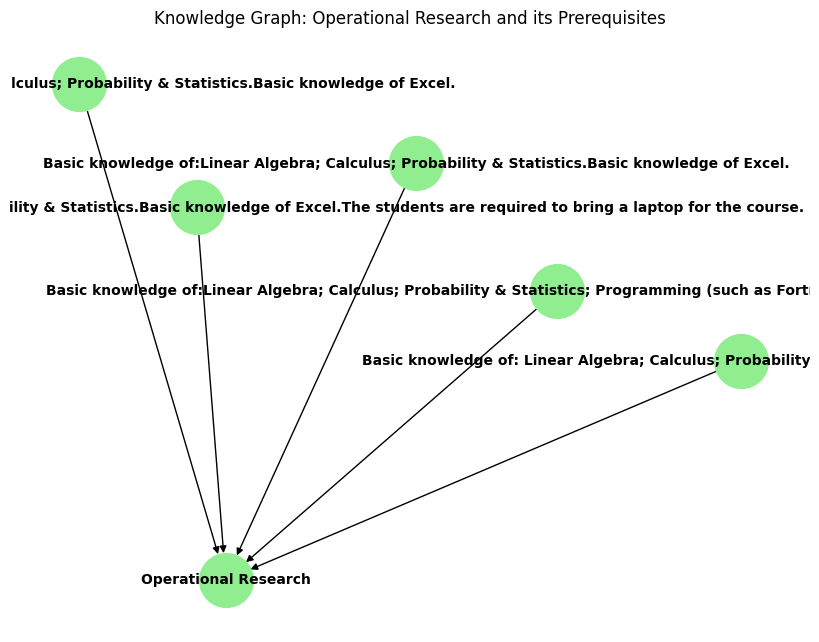

In [43]:
selected_course = 'Operational Research'  

subgraph_nodes = list(knowledge_graph.predecessors(selected_course)) + [selected_course]
subgraph = knowledge_graph.subgraph(subgraph_nodes)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=1500,
    font_size=10,
    font_weight='bold',
)
plt.title(f"Knowledge Graph: {selected_course} and its Prerequisites")
plt.show()